In [2]:
###########################Code
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
from pycaret.regression import *
#from pycaret.regression import prep_pipe
#import import_ipynb
#import data_loader as dl

warnings.filterwarnings("ignore")

In [3]:

def run_auto_ml(train_df, test_df, dependent_col, feature_cols, normal_transform):
    # Model Definitions
    s = setup(data = train_df,
              test_data = test_df,
              target = dependent_col,
              fold_strategy = 'timeseries',
              numeric_features = feature_cols,
              fold = 3,
              transform_target = normal_transform,
              feature_selection = True,
              feature_selection_threshold = 0.8,
              remove_multicollinearity = True,
              multicollinearity_threshold = 0.9,
              session_id = 123)

    # Creates model comparison matrix
    best = compare_models(sort = 'MAE')
    results = pull()
    model_results = results.Model.tolist()
    print(type(best))
    return best

def get_important_features(get_config, best):
    # Get list of features and their values
    features = pd.DataFrame({'Feature': get_config('X_train').columns,
                             'Variable Importance' : abs(best.coef_)}).sort_values(by='Variable Importance', ascending=False)
    features['Variable Importance'] = features['Variable Importance'].astype(float)

    # Here we want to get features with an absolute value variable importance score of 1 or greater
    features = features[features['Variable Importance'] >= 1]
    features = features.reset_index(drop=True)
    return features

## Data Loader

In [4]:
cols = ['File'  ,'Product0'  ,'Account0'  ,'AccountDescription'  ,'Item'  ,'FY 2015 Total'  ,'Actual - 20140601'  ,
        'Actual - 20140701'  ,'Actual - 20140801'  ,'Actual - 20140901'  ,'Actual - 20141001'  ,'Actual - 20141101'  ,
        'Actual - 20141201'  ,'Actual - 20150101'  ,'Actual - 20150201'  ,'Actual - 20150301'  ,'Actual - 20150401'  ,
        'Actual - 20150501'  ,'FY 2016 Total'  ,'Actual - 20150601'  ,'Actual - 20150701'  ,'Actual - 20150801'  ,
        'Actual - 20150901'  ,'Actual - 20151001'  ,'Actual - 20151101'  ,'Actual - 20151201'  ,'Actual - 20160101'  ,
        'Actual - 20160201'  ,'Actual - 20160301'  ,'Actual - 20160401'  ,'Actual - 20160501'  ,'FY 2017 Total'  ,
        'Actual - 20160601'  ,'Actual - 20160701'  ,'Actual - 20160801'  ,'Actual - 20160901'  ,'Actual - 20161001'  ,
        'Actual - 20161101'  ,'Actual - 20161201'  ,'Actual - 20170101'  ,'Actual - 20170201'  ,'Actual - 20170301'  ,
        'Actual - 20170401'  ,'Actual - 20170501'  ,'FY 2018 Total'  ,'Actual - 20170601'  ,'Actual - 20170701'  ,
        'Actual - 20170801'  ,'Actual - 20170901'  ,'Actual - 20171001'  ,'Actual - 20171101'  ,'Actual - 20171201'  ,
        'Actual - 20180101'  ,'Actual - 20180201'  ,'Actual - 20180301'  ,'Actual - 20180401'  ,'Actual - 20180501'  ,
        'FY 2019 Total'  ,'Actual - 20180601'  ,'Actual - 20180701'  ,'Actual - 20180801'  ,'Actual - 20180901'  ,
        'Actual - 20181001'  ,'Actual - 20181101'  ,'Actual - 20181201'  ,'Actual - 20190101'  ,'Actual - 20190201'  ,
        'Actual - 20190301'  ,'Actual - 20190401'  ,'Actual - 20190501'  ,'FY 2020 Total'  ,'Actual - 20190601'  ,'Actual - 20190701'  ,'Actual - 20190801'  ,'Actual - 20190901'  ,'Actual - 20191001'  ,'Actual - 20191101'  ,
        'Actual - 20191201'  ,'Actual - 20200101'  ,'Actual - 20200201'  ,'Actual - 20200301'  ,'Actual - 20200401'  ,
        'Actual - 20200501'  ,'FY 2021 Total'  ,'Actual - 20200601'  ,'Actual - 20200701'  ,'Actual - 20200801'  ,
        'Actual - 20200901'  ,'Actual - 20201001'  ,'Actual - 20201101'  ,'Actual - 20201201'  ,'Actual - 20210101'  ,
        'Actual - 20210201'  ,'Actual - 20210301'  ,'Actual - 20210401'  ,'Actual - 20210501'  ,'Actual - 20210601'  ,
        'Actual - 20210701'  ,'Actual - 20210801'  ,'Actual - 20210901'  ,'Actual - 20211001'  ,'Actual - 20211101'  ,
        'Actual - 20211201'  ,'Actual - 20220101'  ,'Forecast - 20220201'  ,'Forecast - 20220301'  ,
        'Forecast - 20220401'  ,'Forecast - 20220501']

In [5]:
data_file = 'Paychex_data.xlsx'
df = pd.read_excel(data_file, names=cols, skiprows=5)


In [6]:
# drop the totals columns
drops = ['FY 2015 Total' ,'FY 2016 Total' ,'FY 2017 Total' ,'FY 2018 Total' ,'FY 2019 Total' ,'FY 2020 Total' ,'FY 2021 Total']
df.drop(columns=drops, inplace=True)

In [7]:
# drop unnecessary rows
df= df.dropna(subset=['Item'])

In [8]:
level_0_list = ['401K Asset fee & BP Revenue'
    ,'401K Fee Revenue'
    ,'ASO Allocation'
    ,'ASO Revenue - Oasis'
    ,'Benetrac'
    ,'Cafeteria Plans Revenue'
    ,'Delivery Revenue'
    ,'Emerging Products'
    ,'ESR Revenue'
    ,'Full Service Unemployment Revenue'
    ,'Health Benefits'
    ,'HR Online'
    ,'HR Solutions (PEO)'
    ,'Interest on Funds Held for Clients'
    ,'Other Processing Revenue'
    ,'Payroll blended products'
    ,'SurePayroll.'
    ,'Time & Attendance'
    ,'Total international'
    ,'Total Paychex Advance'
    ,'W-2 Revenue'
    ,'Workers Comp - Payment Se']


In [9]:
# keep level 0 rows only
df0 = df[df['Item'].isin(level_0_list)]

In [10]:
flps = ['Actual - 20140601'   ,'Actual - 20140701'   ,'Actual - 20140801'   ,'Actual - 20140901'   ,'Actual - 20141001'
    ,'Actual - 20141101'   ,'Actual - 20141201'   ,'Actual - 20150101'   ,'Actual - 20150201'   ,'Actual - 20150301'
    ,'Actual - 20150401'   ,'Actual - 20150501'   ,'Actual - 20150601'   ,'Actual - 20150701'   ,'Actual - 20150801'
    ,'Actual - 20150901'   ,'Actual - 20151001'   ,'Actual - 20151101'   ,'Actual - 20151201'   ,'Actual - 20160101'
    ,'Actual - 20160201'   ,'Actual - 20160301'   ,'Actual - 20160401'   ,'Actual - 20160501'   ,'Actual - 20160601'
    ,'Actual - 20160701'   ,'Actual - 20160801'   ,'Actual - 20160901'   ,'Actual - 20161001'   ,'Actual - 20161101'
    ,'Actual - 20161201'   ,'Actual - 20170101'   ,'Actual - 20170201'   ,'Actual - 20170301'   ,'Actual - 20170401'
    ,'Actual - 20170501'   ,'Actual - 20170601'   ,'Actual - 20170701'   ,'Actual - 20170801'   ,'Actual - 20170901'
    ,'Actual - 20171001'   ,'Actual - 20171101'   ,'Actual - 20171201'   ,'Actual - 20180101'   ,'Actual - 20180201'
    ,'Actual - 20180301'   ,'Actual - 20180401'   ,'Actual - 20180501'   ,'Actual - 20180601'   ,'Actual - 20180701'
    ,'Actual - 20180801'   ,'Actual - 20180901'   ,'Actual - 20181001'   ,'Actual - 20181101'   ,'Actual - 20181201'
    ,'Actual - 20190101'   ,'Actual - 20190201'   ,'Actual - 20190301'   ,'Actual - 20190401'   ,'Actual - 20190501'
    ,'Actual - 20190601'   ,'Actual - 20190701'   ,'Actual - 20190801'   ,'Actual - 20190901'   ,'Actual - 20191001'
    ,'Actual - 20191101'   ,'Actual - 20191201'   ,'Actual - 20200101'   ,'Actual - 20200201'   ,'Actual - 20200301'
    ,'Actual - 20200401'   ,'Actual - 20200501'   ,'Actual - 20200601'   ,'Actual - 20200701'   ,'Actual - 20200801'
    ,'Actual - 20200901'   ,'Actual - 20201001'   ,'Actual - 20201101'   ,'Actual - 20201201'   ,'Actual - 20210101'
    ,'Actual - 20210201'   ,'Actual - 20210301'   ,'Actual - 20210401'   ,'Actual - 20210501'   ,'Actual - 20210601'
    ,'Actual - 20210701'   ,'Actual - 20210801'   ,'Actual - 20210901'   ,'Actual - 20211001'   ,'Actual - 20211101'
    ,'Actual - 20211201'   ,'Actual - 20220101'   ,'Forecast - 20220201'   ,'Forecast - 20220301'
    ,'Forecast - 20220401'   ,'Forecast - 20220501']
df0 = pd.melt(df0, id_vars=['File', 'Product0', 'Account0', 'AccountDescription', 'Item'],
              value_vars=flps, var_name='Scenario_Date', value_name='Amount')

In [11]:
df0[['Scenario','CalendarDate']] = df0.Scenario_Date.str.split(" - ",expand=True)

In [12]:
df0.drop(columns=['Scenario_Date'], inplace=True)

In [13]:
df0

,File,Product0,Account0,AccountDescription,Item,Amount,Scenario,CalendarDate
0,401kRevenueDetail.txt,401(K) PLANS,5600 401K ADMINISTRATION,FEE REVENUE - NA - RW,401K Fee Revenue,927785.0,Actual,20140601
1,401kRevenueDetail.txt,401K NSI EXPORT,5600 401K ADMINISTRATION,FEE REVENUE - NA - RW,401K Fee Revenue,-460.0,Actual,20140601
2,401kRevenueDetail.txt,RETIREMENT PLANS,5600 401K ADMINISTRATION,FEE REVENUE - NA - RW,401K Fee Revenue,NaN,Actual,20140601
3,401kRevenueDetail.txt,401(K) PLANS,5745 EPLAN,FEE REVENUE - NA - RW,401K Fee Revenue,15943.0,Actual,20140601
4,401kRevenueDetail.txt,401(K) PLANS,5600 401K ADMINISTRATION,SETUP REVENUE - RW,401K Fee Revenue,919141.0,Actual,20140601
...,...,...,...,...,...,...,...,...
162043,SurePayollRevenue.txt,PREMIER HRS,1501 SP Direct GB,SALES DISCOUNTS - CONTRACT PLAN - RW,SurePayroll.,NaN,Forecast,20220501
162044,SurePayollRevenue.txt,PREMIER HRS,1506 SP BOP PARTNER,FEE REVENUE - CONTRACT PLAN - RW,SurePayroll.,NaN,Forecast,20220501
162045,SurePayollRevenue.txt,PREMIER HRS,1506 SP BOP PARTNER,MAINTENANCE REVENUE - NA - RW,SurePayroll.,NaN,Forecast,20220501
162046,SurePayollRevenue.txt,PREMIER HRS,1506 SP BOP PARTNER,SALES DISCOUNTS - NA - RW,SurePayroll.,NaN,Forecast,20220501


In [14]:
df0['Item'] = df0['Item'].replace(" ","", regex=True)

In [15]:
df0_acct = df0[['Item','Account0','Scenario','CalendarDate','Amount']]
df0_prod = df0[['Item','Product0','Scenario','CalendarDate','Amount']]

df0_group = df0.groupby(['Item','Scenario','CalendarDate'])['Amount'].sum().reset_index()
#print(df0_group)
item_list = df0_group['Item'].unique().tolist()

df_piv = df0_group.pivot(index=['CalendarDate', 'Scenario'], columns='Item', values='Amount')
df_piv = df_piv.reset_index()

In [16]:
df_piv

Item,CalendarDate,Scenario,401KAssetfee&BPRevenue,401KFeeRevenue,ASOAllocation,ASORevenue-Oasis,Benetrac,CafeteriaPlansRevenue,DeliveryRevenue,ESRRevenue,EmergingProducts,FullServiceUnemploymentRevenue,HROnline,HRSolutions(PEO),HealthBenefits,InterestonFundsHeldforClients,OtherProcessingRevenue,Payrollblendedproducts,SurePayroll.,Time&Attendance,TotalPaychexAdvance,Totalinternational,W-2Revenue,WorkersComp-PaymentSe
0,20140601,Actual,4261452.0,10621963.0,7255027.55,0.00,1922941.0,1714950.0,7393351.97,47602.0,796063.0,1869396.0,3930007.0,21143605.0,5225672.0,3308154.0,4765775.19,99633512.0,3246967.02,4651817.0,0.0,0.0,7031234.09,4858397.0
1,20140701,Actual,4513388.0,10558382.0,9070820.80,0.00,1916579.0,1698495.0,13513741.18,67521.0,986955.0,2341533.0,4535022.0,25838048.0,5108935.0,3466375.0,6502729.54,121619696.0,3362473.02,5165885.0,0.0,0.0,7325377.82,5244318.0
2,20140801,Actual,4486436.0,10297495.0,7489159.50,0.00,1944830.0,1829118.0,7286966.62,79771.0,924689.0,1986835.0,3869725.0,21762760.0,5380159.0,3434419.0,4215268.17,99472483.0,3286111.93,4856677.0,0.0,0.0,7443620.46,5588578.0
3,20140901,Actual,4355891.0,12719409.0,7011292.24,0.00,1933042.0,1710602.0,7081861.96,105330.0,732444.0,1888067.0,3847567.0,20288451.0,6281392.0,3419918.0,4726806.24,94198230.0,3345328.53,5098280.0,0.0,0.0,7414842.11,4968759.0
4,20141001,Actual,4455231.0,13797724.0,9372927.59,0.00,1956820.0,1702224.0,13741077.44,143956.0,1051920.0,2491011.0,4967922.0,26755143.0,6107475.0,3472038.0,6514037.07,124353873.0,3402641.78,5188982.0,0.0,0.0,7818212.35,5752070.0
5,20141101,Actual,4466548.0,11049609.0,7492286.01,0.00,1987727.0,1784045.0,7259539.93,178933.0,965427.0,2048831.0,4044570.0,21881382.0,5589002.0,3469203.0,4528513.14,98868618.0,3221738.58,5209888.0,0.0,0.0,7542659.46,4890557.0
6,20141201,Actual,4309643.0,15706255.0,7355083.53,0.00,2022314.0,1741201.0,7559482.15,235468.0,852949.0,2006345.0,4284873.0,21273963.0,5315219.0,3550962.0,5170797.88,99281713.0,3627472.60,5266992.0,0.0,0.0,8117392.17,5773054.0
7,20150101,Actual,4855051.0,12860281.0,9431085.71,0.00,1986486.0,1714890.0,19855110.85,607646.0,908730.0,2606423.0,5095101.0,27128652.0,5339084.0,3683535.0,6834385.36,124388966.0,3589702.61,5662406.0,0.0,0.0,9377834.84,5384244.0
8,20150201,Actual,4218929.0,12618365.0,7525036.15,0.00,1898082.0,1821176.0,7116009.19,454163.0,946365.0,2103998.0,3978493.0,21605352.0,5420555.0,3509475.0,4722991.56,95862151.0,3491857.24,5273882.0,0.0,0.0,7226134.53,4903952.0
9,20150301,Actual,4608872.0,11388694.0,7170010.02,0.00,1921510.0,1715383.0,6970218.27,905763.0,898680.0,2025107.0,4012338.0,20945564.0,6383528.0,3645265.0,4772800.16,92298659.0,3460680.80,5265180.0,0.0,0.0,6909620.47,5445220.0


In [17]:
#dependent_col = '401K Asset fee & BP Revenue'
#dependent_col = '401K Fee Revenue'
#dependent_col = 'ASO Allocation'
#dependent_col = 'ASO Revenue - Oasis'
#dependent_col = 'Benetrac'
#dependent_col = 'Cafeteria Plans Revenue'
#dependent_col = 'Delivery Revenue'
#dependent_col = 'Emerging Products'
#dependent_col = 'ESR Revenue'
#dependent_col = 'Full Service Unemployment Revenue'
#dependent_col = 'Health Benefits'
#dependent_col = 'HR Online'
#dependent_col = 'HR Solutions (PEO)'
#dependent_col = 'Interest on Funds Held for Clients'
#dependent_col = 'Other Processing Revenue'
#dependent_col = 'Payroll blended products'
#dependent_col = 'SurePayroll.'
#dependent_col = 'Time & Attendance'
#dependent_col = 'Total international'
#dependent_col = 'Total Paychex Advance'
#dependent_col = 'W-2 Revenue'
#dependent_col = 'Workers Comp - Payment Se'
dependent_col = 'TotalRevenue'
feature_cols = [c.replace(" ","") for c in level_0_list]

if dependent_col in feature_cols:
    feature_cols.remove(dependent_col)

train_start_dt = '20140601'
train_end_dt = '20200501'
test_start_dt = '20200601'
test_end_dt = '20210501'
pred_start_dt = '20210601'
pred_end_dt = '20220101'
forecast_window = 8
has_actuals = True

In [18]:
#print(df_piv)

df_ts = df_piv[df_piv['Scenario'] == 'Actual']
df_ts['Series'] = np.arange(1,len(df_ts)+1)
df_ts['Year'] = df_ts['CalendarDate'].astype(str).str[:4]
df_ts['Month'] = df_ts['CalendarDate'].astype(str).str[-4:].str[:2]
df_ts['TotalRevenue'] = df_ts[item_list].sum(axis=1)
df_ts.rename_axis(None, axis=1, inplace=True)
train_df = df_ts[(df_ts['CalendarDate'].astype(int) >= int(train_start_dt)) &
              (df_ts['CalendarDate'].astype(int) <= int(train_end_dt))]
test_df = df_ts[(df_ts['CalendarDate'].astype(int) >= int(test_start_dt)) &
                (df_ts['CalendarDate'].astype(int) <= int(test_end_dt))]
comb_df = df_ts[(df_ts['CalendarDate'].astype(int) >= int(train_start_dt)) &
                (df_ts['CalendarDate'].astype(int) <= int(test_end_dt))]

In [19]:

# create training dataframe
train_df['CalendarDate'] = pd.to_datetime(train_df['CalendarDate'])
#train_df.set_index('Calendar Date', inplace=True)

# create test dataframe

test_df['CalendarDate'] = pd.to_datetime(test_df['CalendarDate'])
#test_df.set_index('Calendar Date', inplace=True)

# create combo dataframe
comb_df['CalendarDate'] = pd.to_datetime(comb_df['CalendarDate'])
#comb_df.set_index('Calendar Date', inplace=True)


In [20]:
train_df

,CalendarDate,Scenario,401KAssetfee&BPRevenue,401KFeeRevenue,ASOAllocation,ASORevenue-Oasis,Benetrac,CafeteriaPlansRevenue,DeliveryRevenue,ESRRevenue,EmergingProducts,FullServiceUnemploymentRevenue,HROnline,HRSolutions(PEO),HealthBenefits,InterestonFundsHeldforClients,OtherProcessingRevenue,Payrollblendedproducts,SurePayroll.,Time&Attendance,TotalPaychexAdvance,Totalinternational,W-2Revenue,WorkersComp-PaymentSe,Series,Year,Month,TotalRevenue
0,2014-06-01,Actual,4261452.0,10621963.0,7255027.55,0.00,1922941.0,1714950.0,7393351.97,47602.0,796063.0,1869396.0,3930007.0,21143605.0,5225672.0,3308154.0,4765775.19,99633512.0,3246967.02,4651817.0,0.0,0.0,7031234.09,4858397.0,1,2014,06,1.936779e+08
1,2014-07-01,Actual,4513388.0,10558382.0,9070820.80,0.00,1916579.0,1698495.0,13513741.18,67521.0,986955.0,2341533.0,4535022.0,25838048.0,5108935.0,3466375.0,6502729.54,121619696.0,3362473.02,5165885.0,0.0,0.0,7325377.82,5244318.0,2,2014,07,2.328363e+08
2,2014-08-01,Actual,4486436.0,10297495.0,7489159.50,0.00,1944830.0,1829118.0,7286966.62,79771.0,924689.0,1986835.0,3869725.0,21762760.0,5380159.0,3434419.0,4215268.17,99472483.0,3286111.93,4856677.0,0.0,0.0,7443620.46,5588578.0,3,2014,08,1.956351e+08
3,2014-09-01,Actual,4355891.0,12719409.0,7011292.24,0.00,1933042.0,1710602.0,7081861.96,105330.0,732444.0,1888067.0,3847567.0,20288451.0,6281392.0,3419918.0,4726806.24,94198230.0,3345328.53,5098280.0,0.0,0.0,7414842.11,4968759.0,4,2014,09,1.911275e+08
4,2014-10-01,Actual,4455231.0,13797724.0,9372927.59,0.00,1956820.0,1702224.0,13741077.44,143956.0,1051920.0,2491011.0,4967922.0,26755143.0,6107475.0,3472038.0,6514037.07,124353873.0,3402641.78,5188982.0,0.0,0.0,7818212.35,5752070.0,5,2014,10,2.430453e+08
5,2014-11-01,Actual,4466548.0,11049609.0,7492286.01,0.00,1987727.0,1784045.0,7259539.93,178933.0,965427.0,2048831.0,4044570.0,21881382.0,5589002.0,3469203.0,4528513.14,98868618.0,3221738.58,5209888.0,0.0,0.0,7542659.46,4890557.0,6,2014,11,1.964791e+08
6,2014-12-01,Actual,4309643.0,15706255.0,7355083.53,0.00,2022314.0,1741201.0,7559482.15,235468.0,852949.0,2006345.0,4284873.0,21273963.0,5315219.0,3550962.0,5170797.88,99281713.0,3627472.60,5266992.0,0.0,0.0,8117392.17,5773054.0,7,2014,12,2.034512e+08
7,2015-01-01,Actual,4855051.0,12860281.0,9431085.71,0.00,1986486.0,1714890.0,19855110.85,607646.0,908730.0,2606423.0,5095101.0,27128652.0,5339084.0,3683535.0,6834385.36,124388966.0,3589702.61,5662406.0,0.0,0.0,9377834.84,5384244.0,8,2015,01,2.513096e+08
8,2015-02-01,Actual,4218929.0,12618365.0,7525036.15,0.00,1898082.0,1821176.0,7116009.19,454163.0,946365.0,2103998.0,3978493.0,21605352.0,5420555.0,3509475.0,4722991.56,95862151.0,3491857.24,5273882.0,0.0,0.0,7226134.53,4903952.0,9,2015,02,1.946970e+08
9,2015-03-01,Actual,4608872.0,11388694.0,7170010.02,0.00,1921510.0,1715383.0,6970218.27,905763.0,898680.0,2025107.0,4012338.0,20945564.0,6383528.0,3645265.0,4772800.16,92298659.0,3460680.80,5265180.0,0.0,0.0,6909620.47,5445220.0,10,2015,03,1.907431e+08


## Model training

In [21]:
train_df.shape

(72, 28)

In [22]:

# run auto ml and get the most important features
best = run_auto_ml(train_df, test_df, dependent_col, feature_cols, False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2036732.6078,8174510846932.3086,2381153.1836,0.9611,0.0099,0.0084,0.8600
ridge,Ridge Regression,2316287.1667,11541257519104.0000,2611450.1667,0.9448,0.0109,0.0096,0.8400
lr,Linear Regression,2398829.3542,12016926457856.0000,2780261.0000,0.9442,0.0114,0.0099,1.1933
en,Elastic Net,3522188.5208,30384888960341.3320,3999524.7917,0.8585,0.0168,0.0147,0.0033
llar,Lasso Least Angle Regression,4987447.5407,31488466134195.5000,5328438.5462,0.9057,0.0215,0.0199,1.0267
huber,Huber Regressor,5311821.3579,43098937174210.0859,6386164.5413,0.6938,0.0256,0.0213,0.0233
xgboost,Extreme Gradient Boosting,10229797.1667,449263551818410.6875,15879924.6667,0.4877,0.0562,0.0361,0.0967
gbr,Gradient Boosting Regressor,11547361.7240,489325062643018.5625,17810809.6875,0.3354,0.0639,0.0414,0.0200
par,Passive Aggressive Regressor,11945788.1574,408555262743995.8125,18127704.2142,0.1237,0.0674,0.0449,0.0067
rf,Random Forest Regressor,12814117.1407,548402386478440.2500,19380697.4237,0.1682,0.0702,0.0461,0.0533


<class 'sklearn.linear_model._bayes.BayesianRidge'>


In [24]:
features = get_important_features(get_config, best)

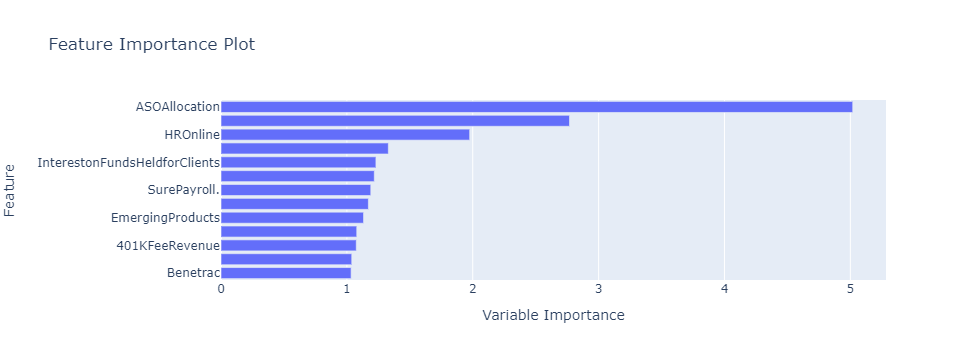

In [26]:
# Feature Importance Plot - This is the out of box pycaret plot
#plot_model(best, plot = 'feature')

# plot the most important features
fig = px.bar(features.sort_values('Variable Importance', ascending=True),
             x='Variable Importance',
             y='Feature',
             orientation='h',
             title='Feature Importance Plot')
fig.show()

In [27]:
best

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [28]:
type(best)

sklearn.linear_model._bayes.BayesianRidge

In [29]:
best.n_features_in_

47

In [30]:
comb_df.shape

(84, 28)

In [31]:
# ------------------------------------------------------------------------------------- #
# generate and plot predicted values on the original dataset
# ------------------------------------------------------------------------------------- #

predictions = predict_model(best, data=comb_df)
predictions['Date'] = pd.date_range(start=str(train_start_dt), end = str(test_end_dt), freq = 'MS')
predictions

,CalendarDate,Scenario,401KAssetfee&BPRevenue,401KFeeRevenue,ASOAllocation,ASORevenue-Oasis,Benetrac,CafeteriaPlansRevenue,DeliveryRevenue,ESRRevenue,...,TotalPaychexAdvance,Totalinternational,W-2Revenue,WorkersComp-PaymentSe,Series,Year,Month,TotalRevenue,Label,Date
0,2014-06-01,Actual,4261452.0,10621963.0,7255027.55,0.00,1922941.0,1714950.0,7393351.97,47602.0,...,0.0,0.0,7031234.09,4858397.0,1,2014,06,1.936779e+08,1.936202e+08,2014-06-01
1,2014-07-01,Actual,4513388.0,10558382.0,9070820.80,0.00,1916579.0,1698495.0,13513741.18,67521.0,...,0.0,0.0,7325377.82,5244318.0,2,2014,07,2.328363e+08,2.324266e+08,2014-07-01
2,2014-08-01,Actual,4486436.0,10297495.0,7489159.50,0.00,1944830.0,1829118.0,7286966.62,79771.0,...,0.0,0.0,7443620.46,5588578.0,3,2014,08,1.956351e+08,1.959262e+08,2014-08-01
3,2014-09-01,Actual,4355891.0,12719409.0,7011292.24,0.00,1933042.0,1710602.0,7081861.96,105330.0,...,0.0,0.0,7414842.11,4968759.0,4,2014,09,1.911275e+08,1.912629e+08,2014-09-01
4,2014-10-01,Actual,4455231.0,13797724.0,9372927.59,0.00,1956820.0,1702224.0,13741077.44,143956.0,...,0.0,0.0,7818212.35,5752070.0,5,2014,10,2.430453e+08,2.435622e+08,2014-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2021-01-01,Actual,8601656.0,14541668.0,13265382.71,273995.85,1390060.0,1771611.0,22548298.89,3955284.0,...,5542882.0,0.0,80988881.77,5399816.0,80,2021,01,3.436167e+08,3.433331e+08,2021-01-01
80,2021-02-01,Actual,8798633.0,14785257.0,13666646.86,291755.39,1354163.0,1685096.0,6430193.76,11179898.0,...,5572132.0,0.0,28599.77,5392816.0,81,2021,02,2.543673e+08,2.542883e+08,2021-02-01
81,2021-03-01,Actual,9014864.0,15017238.0,16053700.85,253715.04,1404115.0,1667442.0,7657980.44,5180501.0,...,6534835.0,0.0,-43477.46,7384007.0,82,2021,03,2.802692e+08,2.818997e+08,2021-03-01
82,2021-04-01,Actual,8986182.0,14843783.0,14728764.11,260657.63,1349889.0,1683761.0,11701117.00,4329239.0,...,6052148.0,0.0,44625.45,6571571.0,83,2021,04,2.722801e+08,2.731794e+08,2021-04-01


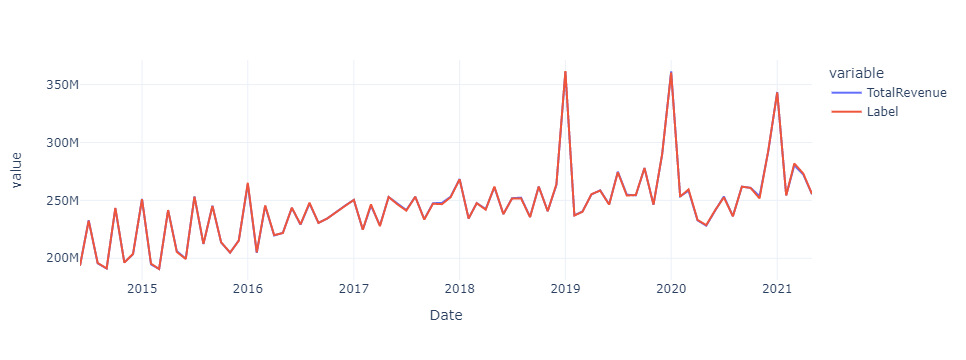

In [34]:
fig = px.line(predictions, x='Date', y=[dependent_col, "Label"], template = 'plotly_white')
fig.show()

In [35]:
# ------------------------------------------------------------------------------------- #
# This section now applies the trained/tested model to make future predictions
# ------------------------------------------------------------------------------------- #

pred_df = df_ts[(df_ts['Calendar Date'].astype(int) >= int(pred_start_dt)) &
                (df_ts['Calendar Date'].astype(int) <= int(pred_end_dt))]

KeyError: 'Calendar Date'

## Save as PMML

In [36]:
from sklearn2pmml import make_pmml_pipeline, sklearn2pmml, PMMLPipeline

### Best Model

In [37]:
train_df.shape

(72, 28)

In [29]:
pmml_pipe = make_pmml_pipeline(best)

In [96]:
type(pmml_pipe)

sklearn2pmml.pipeline.PMMLPipeline

In [30]:
sklearn2pmml(pmml_pipe, "model.pmml")

In [97]:
best

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [99]:
best.predict(test_df)

TypeError: float() argument must be a string or a number, not 'Timestamp'

### With pipeline

In [38]:
pipeline, name = save_model(best, 'pycaret_pipeline')

Transformation Pipeline and Model Successfully Saved


In [39]:
loaded_model = load_model('pycaret_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [40]:
type(loaded_model)

sklearn.pipeline.Pipeline

In [41]:
predict_model(loaded_model, test_df)

,CalendarDate,Scenario,401KAssetfee&BPRevenue,401KFeeRevenue,ASOAllocation,ASORevenue-Oasis,Benetrac,CafeteriaPlansRevenue,DeliveryRevenue,ESRRevenue,...,Time&Attendance,TotalPaychexAdvance,Totalinternational,W-2Revenue,WorkersComp-PaymentSe,Series,Year,Month,TotalRevenue,Label
72,2020-06-01,Actual,7095696.0,13747697.0,12924068.68,550621.70,1330325.0,1681963.0,7188744.17,3867043.0,...,9962100.0,3433099.0,0.0,103884.59,6939467.0,73,2020,06,2.412803e+08,2.415843e+08
73,2020-07-01,Actual,7614673.0,14737454.0,13177301.28,582068.16,1435919.0,1695288.0,11792398.32,3763539.0,...,10476574.0,3460938.0,0.0,162905.40,6232641.0,74,2020,07,2.534185e+08,2.526668e+08
74,2020-08-01,Actual,7551520.0,14392679.0,12650448.43,446718.60,1390286.0,1681833.0,6869452.00,1489544.0,...,10229001.0,3727359.0,0.0,176199.40,5374076.0,75,2020,08,2.363406e+08,2.362594e+08
75,2020-09-01,Actual,7747346.0,16883067.0,14364661.70,414876.77,1416866.0,1607463.0,7663056.78,3929487.0,...,10968963.0,3933638.0,0.0,227531.19,6776595.0,76,2020,09,2.618818e+08,2.618555e+08
76,2020-10-01,Actual,7793677.0,14170117.0,13775386.37,400464.45,1430005.0,1775330.0,12032858.64,3758486.0,...,10645208.0,4317897.0,0.0,183308.66,6517515.0,77,2020,10,2.608692e+08,2.607598e+08
77,2020-11-01,Actual,8000295.0,14230746.0,13918771.19,328000.14,1371422.0,1703859.0,7046763.65,1549635.0,...,13272131.0,4567347.0,0.0,208805.40,6101679.0,78,2020,11,2.537481e+08,2.516819e+08
78,2020-12-01,Actual,8482353.0,14829062.0,15826211.23,358024.69,1416567.0,1687339.0,7635486.71,3713962.0,...,11300057.0,4829985.0,0.0,233016.32,7500443.0,79,2020,12,2.922436e+08,2.928375e+08
79,2021-01-01,Actual,8601656.0,14541668.0,13265382.71,273995.85,1390060.0,1771611.0,22548298.89,3955284.0,...,11004027.0,5542882.0,0.0,80988881.77,5399816.0,80,2021,01,3.436167e+08,3.433331e+08
80,2021-02-01,Actual,8798633.0,14785257.0,13666646.86,291755.39,1354163.0,1685096.0,6430193.76,11179898.0,...,10433968.0,5572132.0,0.0,28599.77,5392816.0,81,2021,02,2.543673e+08,2.542883e+08
81,2021-03-01,Actual,9014864.0,15017238.0,16053700.85,253715.04,1404115.0,1667442.0,7657980.44,5180501.0,...,11520879.0,6534835.0,0.0,-43477.46,7384007.0,82,2021,03,2.802692e+08,2.818997e+08


In [42]:
pipeline

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['401KAssetfee&BPRevenue',
                                                          '401KFeeRevenue',
                                                          'ASOAllocation',
                                                          'ASORevenue-Oasis',
                                                          'Benetrac',
                                                          'CafeteriaPlansRevenue',
                                                          'DeliveryRevenue',
                                                          'EmergingProducts',
                                                          'ESRRevenue',
                                       

In [43]:
name

'pycaret_pipeline.pkl'

In [44]:
type(pipeline)

sklearn.pipeline.Pipeline

In [36]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.feature_selection.base import SelectorMixin

In [37]:
class SelectorProxy(BaseEstimator):

    def __init__(self, selector):
        self.selector = selector
        try:
            self._copy_attrs()
        except :
            pass

    def _copy_attrs(self):
        try:
            setattr(self, "support_mask_", self.selector._get_support_mask())
        except ValueError:
            pass

    def fit(self, X, y = None, **fit_params):
        self.selector.fit(X, y, **fit_params)
        self._copy_attrs()
        return self

    def transform(self, X):
        return self.selector.transform(X)

In [38]:
def _filter(obj):
    if isinstance(obj, DataFrameMapper):
        obj.features = _filter_steps(obj.features)
        if hasattr(obj, "built_features"):
            if obj.built_features is not None:
                obj.built_features = _filter_steps(obj.built_features)
    elif isinstance(obj, ColumnTransformer):
        obj.transformers = _filter_steps(obj.transformers)
        obj.remainder = _filter(obj.remainder)
        if hasattr(obj, "transformers_"):
            obj.transformers_ = _filter_steps(obj.transformers_)
    elif isinstance(obj, FeatureUnion):
        obj.transformer_list = _filter_steps(obj.transformer_list)
    elif isinstance(obj, Pipeline):
        obj.steps = _filter_steps(obj.steps)
    elif isinstance(obj, SelectorMixin):
        return SelectorProxy(obj)
    elif isinstance(obj, list):
        return [_filter(e) for e in obj]
    return obj

In [39]:
def _filter_steps(steps):
    res = []
    for step in steps:
        print("Step :", _filter(step[1]))
        i = (tuple(step[:1]) + (_filter(step[1]), ) + tuple(step[2:]))
        res.append(i)
    return res

In [40]:
def _get_steps(obj):
    if isinstance(obj, Pipeline):
        return obj.steps
    elif isinstance(obj, BaseEstimator):
        return [("estimator", obj)]
    else:
        raise ValueError()

In [41]:
def make_pmml_pipeline_mod(obj, active_fields = None, target_fields = None):
    """Translates a regular Scikit-Learn estimator or pipeline to a PMML pipeline.

    Parameters:
    ----------
    obj: BaseEstimator
        The object.

    active_fields: list of strings, optional
        Feature names. If missing, "x1", "x2", .., "xn" are assumed.

    target_fields: list of strings, optional
        Label name(s). If missing, "y" is assumed.

    """
    steps = _filter_steps(_get_steps(obj))
    pipeline = PMMLPipeline(steps)
    if active_fields is not None:
        pipeline.active_fields = np.asarray(active_fields)
    if target_fields is not None:
        pipeline.target_fields = np.asarray(target_fields)
    return pipeline

In [100]:
pmml_pipe = make_pmml_pipeline_mod(pipeline, active_fields=feature_cols, target_fields=dependent_col)

TypeError: can only concatenate list (not "tuple") to list

In [46]:
type(pmml_pipe)

sklearn2pmml.pipeline.PMMLPipeline

In [47]:
pmml_pipe

PMMLPipeline(steps=[('dtypes', DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[], ml_usecase='regression',
                     numerical_features=['401KAssetfee&BPRevenue',
                                         '401KFeeRevenue', 'ASOAllocation',
                                         'ASORevenue-Oasis', 'Benetrac',
                                         'CafeteriaPlansRevenue',
                                         'DeliveryRevenue', 'EmergingProducts',
                                         'ESRRevenue',
                                         'FullServiceUnemploymentRevenue',
                                         'HealthBenefits', 'HROnline',
                                         'HRSolutions(PEO)',
                                         'InterestonFundsHeldforClients',
                                         'OtherProcessingRevenue',
                                         'Payrollblendedp

In [48]:
sklearn2pmml(pmml_pipe, "model_pipeline_1.pmml",  with_repr=True)

Standard output is empty
Standard error:
Exception in thread "main" net.razorvine.pickle.PickleException: failed to __setstate__()
	at net.razorvine.pickle.Unpickler.load_build(Unpickler.java:395)
	at net.razorvine.pickle.Unpickler.dispatch(Unpickler.java:220)
	at org.jpmml.python.CustomUnpickler.dispatch(CustomUnpickler.java:31)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:109)
	at numpy.core.NDArrayUtil.readObject(NDArrayUtil.java:389)
	at numpy.core.TypeDescriptor.read(TypeDescriptor.java:165)
	at numpy.core.NDArrayUtil.parseArray(NDArrayUtil.java:225)
	at numpy.core.NDArrayUtil.parseData(NDArrayUtil.java:200)
	at joblib.NumpyArrayWrapper.toArray(NumpyArrayWrapper.java:43)
	at org.jpmml.python.PickleUtil$1.dispatch(PickleUtil.java:75)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:109)
	at org.jpmml.python.PickleUtil.unpickle(PickleUtil.java:85)
	at com.sklearn2pmml.Main.run(Main.java:71)
	at com.sklearn2pmml.Main.main(Main.java:62)
Caused by: java.lang.reflect.Inv

RuntimeError: The SkLearn2PMML application has failed. The Java executable should have printed more information about the failure into its standard output and/or standard error streams

In [202]:
import pickle
with open('pycaret_pipeline.pkl', 'rb') as f:
    mod = pickle.load(f)

In [203]:
mod

array(['Calendar Date', 'Scenario', '401K Asset fee & BP Revenue',
       '401K Fee Revenue', 'ASO Allocation', 'ASO Revenue - Oasis',
       'Benetrac', 'Cafeteria Plans Revenue', 'Delivery Revenue',
       'ESR Revenue', 'Emerging Products',
       'Full Service Unemployment Revenue', 'HR Online',
       'HR Solutions (PEO)', 'Health Benefits',
       'Interest on Funds Held for Clients', 'Other Processing Revenue',
       'Payroll blended products', 'SurePayroll.', 'Time & Attendance',
       'Total Paychex Advance', 'Total international', 'W-2 Revenue',
       'Workers Comp - Payment Se', 'Series', 'Year', 'Month'],
      dtype=object)

In [ ]:
# pmml_pipeline = PMMLPipeline([
#     ("prep_pipe", prep_pipe),
#     ("final_model", final_model)
# ])

import pickle

with open("regression.pkl", "wb") as pf:
    pickle.dump(pmml_pipeline, pf)

### JPMML-SkLearn

In [57]:
import sklearn, joblib, sklearn_pandas, sklearn2pmml

In [45]:
pipeline, name = save_model(best, 'pycaret_pipeline')

Transformation Pipeline and Model Successfully Saved


In [209]:
joblib.dump(pipeline, "pipeline.pkl.z", compress = 9)

['pipeline.pkl.z']

In [60]:
from pycaret.regression import prep_pipe

ImportError: cannot import name 'prep_pipe' from 'pycaret.regression' (c:\users\bruno.gonzalez\miniconda3\envs\pyca\lib\site-packages\pycaret\regression.py)

In [52]:
prep_pipe = get_config("prep_pipe")

In [59]:
prep_pipe

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['401KAssetfee&BPRevenue',
                                                          '401KFeeRevenue',
                                                          'ASOAllocation',
                                                          'ASORevenue-Oasis',
                                                          'Benetrac',
                                                          'CafeteriaPlansRevenue',
                                                          'DeliveryRevenue',
                                                          'EmergingProducts',
                                                          'ESRRevenue',
                                       

In [152]:
#prep_pipe = make_union(pipeline[0:4],pipeline[7:9], pipeline[16:21])

In [54]:


# Do the standard PyCaret stuff

from sklearn2pmml.pipeline import PMMLPipeline

pmml_pipeline = PMMLPipeline([
    ("prep_pipe", prep_pipe),
    ("final_model", best)
])



In [55]:
pmml_pipeline

PMMLPipeline(steps=[('prep_pipe', Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['401KAssetfee&BPRevenue',
                                                          '401KFeeRevenue',
                                                          'ASOAllocation',
                                                          'ASORevenue-Oasis',
                                                          'Benetrac',
                                                          'CafeteriaPlansRevenue',
                                                          'DeliveryRevenue',
                                                          'EmergingProducts',
                                                          'ESRRevenue',
     

In [56]:
sklearn2pmml(pmml_pipeline, "pipeline_model.pmml")

Standard output is empty
Standard error:
Exception in thread "main" net.razorvine.pickle.PickleException: failed to __setstate__()
	at net.razorvine.pickle.Unpickler.load_build(Unpickler.java:395)
	at net.razorvine.pickle.Unpickler.dispatch(Unpickler.java:220)
	at org.jpmml.python.CustomUnpickler.dispatch(CustomUnpickler.java:31)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:109)
	at numpy.core.NDArrayUtil.readObject(NDArrayUtil.java:389)
	at numpy.core.TypeDescriptor.read(TypeDescriptor.java:165)
	at numpy.core.NDArrayUtil.parseArray(NDArrayUtil.java:225)
	at numpy.core.NDArrayUtil.parseData(NDArrayUtil.java:200)
	at joblib.NumpyArrayWrapper.toArray(NumpyArrayWrapper.java:43)
	at org.jpmml.python.PickleUtil$1.dispatch(PickleUtil.java:75)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:109)
	at org.jpmml.python.PickleUtil.unpickle(PickleUtil.java:85)
	at com.sklearn2pmml.Main.run(Main.java:71)
	at com.sklearn2pmml.Main.main(Main.java:62)
Caused by: java.lang.reflect.Inv

RuntimeError: The SkLearn2PMML application has failed. The Java executable should have printed more information about the failure into its standard output and/or standard error streams

### Pipeline appart

In [46]:
from sklearn2pmml import make_pmml_pipeline, sklearn2pmml, PMMLPipeline

In [37]:
type(best)

sklearn.linear_model._bayes.BayesianRidge

In [43]:
best.n_features_in_

47

In [38]:
prep_pipe = get_config("prep_pipe")

In [39]:
type(prep_pipe)

sklearn.pipeline.Pipeline

In [44]:
comb_df

,CalendarDate,Scenario,401KAssetfee&BPRevenue,401KFeeRevenue,ASOAllocation,ASORevenue-Oasis,Benetrac,CafeteriaPlansRevenue,DeliveryRevenue,ESRRevenue,...,SurePayroll.,Time&Attendance,TotalPaychexAdvance,Totalinternational,W-2Revenue,WorkersComp-PaymentSe,Series,Year,Month,TotalRevenue
0,2014-06-01,Actual,4261452.0,10621963.0,7255027.55,0.00,1922941.0,1714950.0,7393351.97,47602.0,...,3246967.02,4651817.0,0.0,0.0,7031234.09,4858397.0,1,2014,06,1.936779e+08
1,2014-07-01,Actual,4513388.0,10558382.0,9070820.80,0.00,1916579.0,1698495.0,13513741.18,67521.0,...,3362473.02,5165885.0,0.0,0.0,7325377.82,5244318.0,2,2014,07,2.328363e+08
2,2014-08-01,Actual,4486436.0,10297495.0,7489159.50,0.00,1944830.0,1829118.0,7286966.62,79771.0,...,3286111.93,4856677.0,0.0,0.0,7443620.46,5588578.0,3,2014,08,1.956351e+08
3,2014-09-01,Actual,4355891.0,12719409.0,7011292.24,0.00,1933042.0,1710602.0,7081861.96,105330.0,...,3345328.53,5098280.0,0.0,0.0,7414842.11,4968759.0,4,2014,09,1.911275e+08
4,2014-10-01,Actual,4455231.0,13797724.0,9372927.59,0.00,1956820.0,1702224.0,13741077.44,143956.0,...,3402641.78,5188982.0,0.0,0.0,7818212.35,5752070.0,5,2014,10,2.430453e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2021-01-01,Actual,8601656.0,14541668.0,13265382.71,273995.85,1390060.0,1771611.0,22548298.89,3955284.0,...,7062932.96,11004027.0,5542882.0,0.0,80988881.77,5399816.0,80,2021,01,3.436167e+08
80,2021-02-01,Actual,8798633.0,14785257.0,13666646.86,291755.39,1354163.0,1685096.0,6430193.76,11179898.0,...,6757198.28,10433968.0,5572132.0,0.0,28599.77,5392816.0,81,2021,02,2.543673e+08
81,2021-03-01,Actual,9014864.0,15017238.0,16053700.85,253715.04,1404115.0,1667442.0,7657980.44,5180501.0,...,7127288.42,11520879.0,6534835.0,0.0,-43477.46,7384007.0,82,2021,03,2.802692e+08
82,2021-04-01,Actual,8986182.0,14843783.0,14728764.11,260657.63,1349889.0,1683761.0,11701117.00,4329239.0,...,7072846.33,10941869.0,6052148.0,0.0,44625.45,6571571.0,83,2021,04,2.722801e+08


In [41]:
df_trans = prep_pipe.transform(comb_df)

In [42]:
df_trans

,WorkersComp-PaymentSe,ASOAllocation,CalendarDate_month_9,TotalPaychexAdvance,Year_2019,CalendarDate_weekday_2,Month_3,ESRRevenue,Year_2020,CafeteriaPlansRevenue,...,Year_2015,EmergingProducts,401KFeeRevenue,ASORevenue-Oasis,Month_8,CalendarDate_weekday_6,Payrollblendedproducts,DeliveryRevenue,Month_4,Year_2016
0,4858397.0,7255027.5,0.0,0.0,0.0,0.0,0.0,47602.0,0.0,1714950.0,...,0.0,796063.0,10621963.0,0.000000,0.0,1.0,99633512.0,7393352.0,0.0,0.0
1,5244318.0,9070821.0,0.0,0.0,0.0,0.0,0.0,67521.0,0.0,1698495.0,...,0.0,986955.0,10558382.0,0.000000,0.0,0.0,121619696.0,13513741.0,0.0,0.0
2,5588578.0,7489159.5,0.0,0.0,0.0,0.0,0.0,79771.0,0.0,1829118.0,...,0.0,924689.0,10297495.0,0.000000,0.0,0.0,99472480.0,7286966.5,0.0,0.0
3,4968759.0,7011292.0,1.0,0.0,0.0,0.0,0.0,105330.0,0.0,1710602.0,...,0.0,732444.0,12719409.0,0.000000,0.0,0.0,94198232.0,7081862.0,0.0,0.0
4,5752070.0,9372928.0,0.0,0.0,0.0,1.0,0.0,143956.0,0.0,1702224.0,...,0.0,1051920.0,13797724.0,0.000000,0.0,0.0,124353872.0,13741077.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,5399816.0,13265383.0,0.0,5542882.0,0.0,0.0,0.0,3955284.0,1.0,1771611.0,...,0.0,4341243.0,14541668.0,273995.843750,0.0,0.0,94834624.0,22548298.0,0.0,0.0
80,5392816.0,13666647.0,0.0,5572132.0,0.0,0.0,0.0,11179898.0,1.0,1685096.0,...,0.0,3735642.0,14785257.0,291755.375000,0.0,0.0,96978104.0,6430194.0,0.0,0.0
81,7384007.0,16053701.0,0.0,6534835.0,0.0,0.0,0.0,5180501.0,1.0,1667442.0,...,0.0,4687474.0,15017238.0,253715.046875,0.0,0.0,110554128.0,7657980.5,0.0,0.0
82,6571571.0,14728764.0,0.0,6052148.0,0.0,0.0,0.0,4329239.0,1.0,1683761.0,...,0.0,5767059.0,14843783.0,260657.625000,0.0,0.0,105999184.0,11701117.0,0.0,0.0


In [45]:
df_trans.to_csv("transfomed_data.csv", index_label=False)

In [48]:
pmml_pipe = make_pmml_pipeline(best)

In [49]:
sklearn2pmml(pmml_pipe, "model.pmml")

### Niyoka

In [89]:
 from nyoka import skl_to_pmml

In [32]:
pipeline, name = save_model(best, 'pycaret_pipeline')

Transformation Pipeline and Model Successfully Saved


In [50]:
dependent_col

'TotalRevenue'

In [51]:
skl_to_pmml(pipeline=pipeline,col_names=feature_cols,target_name=dependent_col,pmml_f_name="pipeline_model.pmml")

TypeError: This PreProcessing Task is not Supported

In [52]:
pipeline

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['401KAssetfee&BPRevenue',
                                                          '401KFeeRevenue',
                                                          'ASOAllocation',
                                                          'ASORevenue-Oasis',
                                                          'Benetrac',
                                                          'CafeteriaPlansRevenue',
                                                          'DeliveryRevenue',
                                                          'EmergingProducts',
                                                          'ESRRevenue',
                                       

In [46]:
_get_steps(pipeline)

[('dtypes',
  DataTypes_Auto_infer(categorical_features=[], display_types=True,
                       features_todrop=[], id_columns=[], ml_usecase='regression',
                       numerical_features=['401K Asset fee & BP Revenue',
                                           '401K Fee Revenue', 'ASO Allocation',
                                           'ASO Revenue - Oasis', 'Benetrac',
                                           'Cafeteria Plans Revenue',
                                           'Delivery Revenue',
                                           'Emerging Products', 'ESR Revenue',
                                           'Full Service Unemployment Revenue',
                                           'Health Benefits', 'HR Online',
                                           'HR Solutions (PEO)',
                                           'Interest on Funds Held for Clients',
                                           'Other Processing Revenue',
                    

In [49]:
type(pipeline)

sklearn.pipeline.Pipeline

In [50]:
pipeline.predict(test_df)

array([2.41584291e+08, 2.52666768e+08, 2.36259392e+08, 2.61855540e+08,
       2.60759849e+08, 2.51681907e+08, 2.92837477e+08, 3.43333100e+08,
       2.54288340e+08, 2.81899719e+08, 2.73179446e+08, 2.55473918e+08])

In [69]:
pipeline[1:]

Pipeline(memory=None,
         steps=[('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels_in_TestData(replacement_strategy='least '
                                                                         'frequent',
                                                    target='TotalRevenue')),
                ('ordinal', 'passthrough'), ('cardinality', 'pas...
                                       correlation_with_target_threshold=0.0,
                                       target_variable='TotalRevenue',
                                       threshold=0.9)),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',


### Onnx

In [101]:
from skl2onnx import to_onnx

In [102]:
X_sample = get_config('X_train')[:1]

In [103]:
X_sample

,ASORevenue-Oasis,Year_2017,401KFeeRevenue,Month_10,ESRRevenue,CalendarDate_weekday_6,DeliveryRevenue,Payrollblendedproducts,Year_2018,InterestonFundsHeldforClients,...,Benetrac,Year_2014,CalendarDate_month_11,Month_3,OtherProcessingRevenue,CalendarDate_is_month_start_1,CalendarDate_month_6,CafeteriaPlansRevenue,CalendarDate_weekday_3,Scenario_Actual
0,0.0,0.0,10621963.0,0.0,47602.0,1.0,7393352.0,99633512.0,0.0,3308154.0,...,1922941.0,1.0,0.0,0.0,4765775.0,1.0,1.0,1714950.0,0.0,1.0


In [104]:
model_onnx = to_onnx(best, X_sample.to_numpy())

In [105]:
# save the model to drive
with open("model.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

In [117]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType, StringTensorType

initial_type = [('numfeat', FloatTensorType([None, 22])),
                ('strfeat', StringTensorType([None, 1]))]

In [158]:
from sklearn.pipeline import make_union, FeatureUnion

In [224]:
transformer = make_union(pipeline[0:22])

In [225]:
pipe = Pipeline(steps=[('transformer', transformer),
                       ('model', best)])

In [226]:
pipe.predict(train_df)

array([1.93620245e+08, 2.32426612e+08, 1.95926196e+08, 1.91262901e+08,
       2.43562218e+08, 1.96271621e+08, 2.03833614e+08, 2.50967272e+08,
       1.95374888e+08, 1.90760300e+08, 2.41645426e+08, 2.05495567e+08,
       1.99357327e+08, 2.53274692e+08, 2.12448339e+08, 2.45161659e+08,
       2.13827435e+08, 2.04954742e+08, 2.15222179e+08, 2.65223639e+08,
       2.05143300e+08, 2.45678017e+08, 2.20035404e+08, 2.21786336e+08,
       2.43693825e+08, 2.29261148e+08, 2.47976958e+08, 2.30515477e+08,
       2.34337883e+08, 2.40115136e+08, 2.45089867e+08, 2.50391412e+08,
       2.24730919e+08, 2.46570183e+08, 2.27771918e+08, 2.52947564e+08,
       2.46471739e+08, 2.41158170e+08, 2.53136648e+08, 2.33467708e+08,
       2.47135723e+08, 2.46746419e+08, 2.52740529e+08, 2.68218675e+08,
       2.34366245e+08, 2.47619021e+08, 2.41981072e+08, 2.61961388e+08,
       2.38139630e+08, 2.51685625e+08, 2.51749227e+08, 2.35501484e+08,
       2.61857982e+08, 2.40669492e+08, 2.63896109e+08, 3.61755747e+08,
      

In [200]:
for s in pipeline:
    print(s)

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[], ml_usecase='regression',
                     numerical_features=['401KAssetfee&BPRevenue',
                                         '401KFeeRevenue', 'ASOAllocation',
                                         'ASORevenue-Oasis', 'Benetrac',
                                         'CafeteriaPlansRevenue',
                                         'DeliveryRevenue', 'EmergingProducts',
                                         'ESRRevenue',
                                         'FullServiceUnemploymentRevenue',
                                         'HealthBenefits', 'HROnline',
                                         'HRSolutions(PEO)',
                                         'InterestonFundsHeldforClients',
                                         'OtherProcessingRevenue',
                                         'Payrollblendedproducts',
                     

In [207]:
model_onnx = convert_sklearn(pipe, initial_types=initial_type)

MissingShapeCalculator: Unable to find a shape calculator for type '<class 'pycaret.internal.preprocess.Fix_multicollinearity'>'.
It usually means the pipeline being converted contains a
transformer or a predictor with no corresponding converter
implemented in sklearn-onnx. If the converted is implemented
in another library, you need to register
the converted so that it can be used by sklearn-onnx (function
update_registered_converter). If the model is not yet covered
by sklearn-onnx, you may raise an issue to
https://github.com/onnx/sklearn-onnx/issues
to get the converter implemented or even contribute to the
project. If the model is a custom model, a new converter must
be implemented. Examples can be found in the gallery.


In [119]:
pipeline

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['401KAssetfee&BPRevenue',
                                                          '401KFeeRevenue',
                                                          'ASOAllocation',
                                                          'ASORevenue-Oasis',
                                                          'Benetrac',
                                                          'CafeteriaPlansRevenue',
                                                          'DeliveryRevenue',
                                                          'EmergingProducts',
                                                          'ESRRevenue',
                                       

## Deploy

In [82]:
import os
from io import BytesIO
from azure.storage.blob import BlobServiceClient

In [75]:
from src.paychex_ml.utils import load_credentials

In [76]:
credentials = load_credentials("blob_storage",
                               file="C:/Users/bruno.gonzalez/DataspellProjects/Paychex_revenue_forecast/credentials.yml")

In [71]:
os.environ['AZURE_STORAGE_CONNECTION_STRING'] = credentials['conn_string']

In [73]:
deploy_model(pipeline, model_name = 'model_pipeline_1', platform = 'azure', authentication = { 'container'  : 'models' })

Model Successfully Deployed on Azure Storage Blob


In [84]:
# Start client
container_name = "models"
blob_service_client = BlobServiceClient.from_connection_string(credentials['conn_string'])
container_client = blob_service_client.get_container_client(container_name)

In [85]:
# Download file
file = 'model_pipeline_1.pkl'
stream_downloader = container_client.download_blob(file)
stream = BytesIO()
stream_downloader.readinto(stream)

46914

In [87]:
from joblib import dump, load
pipeline_azure = load(stream)

In [88]:
pipeline_azure

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['401KAssetfee&BPRevenue',
                                                          '401KFeeRevenue',
                                                          'ASOAllocation',
                                                          'ASORevenue-Oasis',
                                                          'Benetrac',
                                                          'CafeteriaPlansRevenue',
                                                          'DeliveryRevenue',
                                                          'EmergingProducts',
                                                          'ESRRevenue',
                                       

In [92]:
pipeline_azure.predict(test_df)

array([2.41584291e+08, 2.52666768e+08, 2.36259392e+08, 2.61855540e+08,
       2.60759849e+08, 2.51681907e+08, 2.92837477e+08, 3.43333100e+08,
       2.54288340e+08, 2.81899719e+08, 2.73179446e+08, 2.55473918e+08])

In [93]:
pmml_pipe = make_pmml_pipeline_mod(pipeline_azure)

Step : DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[], ml_usecase='regression',
                     numerical_features=['401KAssetfee&BPRevenue',
                                         '401KFeeRevenue', 'ASOAllocation',
                                         'ASORevenue-Oasis', 'Benetrac',
                                         'CafeteriaPlansRevenue',
                                         'DeliveryRevenue', 'EmergingProducts',
                                         'ESRRevenue',
                                         'FullServiceUnemploymentRevenue',
                                         'HealthBenefits', 'HROnline',
                                         'HRSolutions(PEO)',
                                         'InterestonFundsHeldforClients',
                                         'OtherProcessingRevenue',
                                         'Payrollblendedproducts',
              

In [94]:
sklearn2pmml(pmml_pipe, "pipeline_model.pmml")

Standard output is empty
Standard error:
Exception in thread "main" net.razorvine.pickle.PickleException: failed to __setstate__()
	at net.razorvine.pickle.Unpickler.load_build(Unpickler.java:395)
	at net.razorvine.pickle.Unpickler.dispatch(Unpickler.java:220)
	at org.jpmml.python.CustomUnpickler.dispatch(CustomUnpickler.java:31)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:109)
	at numpy.core.NDArrayUtil.readObject(NDArrayUtil.java:389)
	at numpy.core.TypeDescriptor.read(TypeDescriptor.java:165)
	at numpy.core.NDArrayUtil.parseArray(NDArrayUtil.java:225)
	at numpy.core.NDArrayUtil.parseData(NDArrayUtil.java:200)
	at joblib.NumpyArrayWrapper.toArray(NumpyArrayWrapper.java:43)
	at org.jpmml.python.PickleUtil$1.dispatch(PickleUtil.java:75)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:109)
	at org.jpmml.python.PickleUtil.unpickle(PickleUtil.java:85)
	at com.sklearn2pmml.Main.run(Main.java:71)
	at com.sklearn2pmml.Main.main(Main.java:62)
Caused by: java.lang.reflect.Inv

RuntimeError: The SkLearn2PMML application has failed. The Java executable should have printed more information about the failure into its standard output and/or standard error streams